## Prediction analysis

In [64]:
import os
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import warnings
from IPython.display import Image 
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
#import missingno as mno

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)

In [65]:
os.getcwd()

'/Users/cristina/Desktop/Finance/ProgettoFinance/Dataset'

In [66]:
dataframe = pd.read_csv('Most-Recent-Cohorts-All-Data-Elements.csv', low_memory=False)

## Choose the features that we need in our analysis 

In [67]:
dataframe = dataframe[['CDR3','INSTNM','SAT_AVG','C150_4', 'C150_L4','COMPL_RPY_3YR_RT','NONCOM_RPY_3YR_RT',
                       'GRAD_DEBT_MDN', 'PCTFLOAN', 'MD_EARN_WNE_P8','MEDIAN_HH_INC','COUNT_WNE_INC1_P10', 
                       'COUNT_WNE_INC2_P10','COUNT_WNE_INC3_P10','ICLEVEL', 'UGDS', 'CONTROL', 'COSTT4_A', 
                       'COSTT4_P', 'HIGHDEG']] 

## Split into train and test sets before the pre-processing

In [68]:
df = dataframe[dataframe['CDR3'].notnull()]
test = dataframe[dataframe.CDR3.isnull()]
print(df.shape)
print(test.shape)

(5879, 20)
(927, 20)


## Preprocessing

In [69]:
df = df.sample(frac=1, random_state=1)

In [70]:
df.shape

(5879, 20)

In [71]:
df.head(3)

,CDR3,INSTNM,SAT_AVG,C150_4,C150_L4,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,ICLEVEL,UGDS,CONTROL,COSTT4_A,COSTT4_P,HIGHDEG
5836,0.072,California Technical Academy,NaN,NaN,0.8750,PrivacySuppressed,PrivacySuppressed,7568,0.1286,NaN,NaN,NaN,NaN,NaN,3,778.0,3,NaN,22280.0,1
4926,0.254,Florida Academy of Health & Beauty,NaN,NaN,0.8750,PrivacySuppressed,PrivacySuppressed,5500,0.5085,PrivacySuppressed,NaN,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,3,43.0,3,NaN,18048.0,1
1501,0.066,Lowell Academy Hairstyling Institute,NaN,NaN,0.5918,0.4347826087,0.2666666667,7433,0.9024,20600,76078.56,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,3,95.0,3,NaN,18184.0,1


In [72]:
print(df.info(verbose=True))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5879 entries, 5836 to 5775
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CDR3                5879 non-null   float64
 1   INSTNM              5879 non-null   object 
 2   SAT_AVG             1280 non-null   float64
 3   C150_4              2166 non-null   float64
 4   C150_L4             2713 non-null   float64
 5   COMPL_RPY_3YR_RT    5568 non-null   object 
 6   NONCOM_RPY_3YR_RT   5568 non-null   object 
 7   GRAD_DEBT_MDN       5749 non-null   object 
 8   PCTFLOAN            5157 non-null   float64
 9   MD_EARN_WNE_P8      5009 non-null   object 
 10  MEDIAN_HH_INC       4290 non-null   object 
 11  COUNT_WNE_INC1_P10  5009 non-null   object 
 12  COUNT_WNE_INC2_P10  5009 non-null   object 
 13  COUNT_WNE_INC3_P10  5009 non-null   object 
 14  ICLEVEL             5879 non-null   int64  
 15  UGDS                5171 non-null   float64
 16  CON

In [73]:
print(df.isnull().sum())

CDR3                     0
INSTNM                   0
SAT_AVG               4599
C150_4                3713
C150_L4               3166
COMPL_RPY_3YR_RT       311
NONCOM_RPY_3YR_RT      311
GRAD_DEBT_MDN          130
PCTFLOAN               722
MD_EARN_WNE_P8         870
MEDIAN_HH_INC         1589
COUNT_WNE_INC1_P10     870
COUNT_WNE_INC2_P10     870
COUNT_WNE_INC3_P10     870
ICLEVEL                  0
UGDS                   708
CONTROL                  0
COSTT4_A              2731
COSTT4_P              4163
HIGHDEG                  0
dtype: int64


Some numeric columns are classified as object because they contained some 'PrivacySuppressed' data or null values. The presence of these values hinders the predictive ability of our features. We can either opt for removing the entire rows containing such data or converting these values into NA and then imputing them using different methods. We will opt for the first option in some case where they seem to be non-random missing values, while in the other cases we will opt for the second option. Missing values, then, will be imputed later on.

In [74]:
#train
print(len(df[df['GRAD_DEBT_MDN'] == "PrivacySuppressed"]))
print(len(df[df['COMPL_RPY_3YR_RT'] == "PrivacySuppressed"]))
print(len(df[df['MD_EARN_WNE_P8'] == "PrivacySuppressed"]))
print(len(df[df['COUNT_WNE_INC1_P10'] == "PrivacySuppressed"]))
print(len(df[df['COUNT_WNE_INC3_P10'] == "PrivacySuppressed"]))
print(len(df[df['MEDIAN_HH_INC'] == "PrivacySuppressed"]))
print(df.shape)

603
992
498
890
1547
78
(5879, 20)


In [75]:
df = df.replace('PrivacySuppressed', np.nan)

In [76]:
#test
print(len(test[test['GRAD_DEBT_MDN'] == "PrivacySuppressed"]))
print(len(test[test['COMPL_RPY_3YR_RT'] == "PrivacySuppressed"]))
print(len(test[test['MD_EARN_WNE_P8'] == "PrivacySuppressed"]))
print(len(test[test['COUNT_WNE_INC1_P10'] == "PrivacySuppressed"]))
print(len(test[test['COUNT_WNE_INC3_P10'] == "PrivacySuppressed"]))
print(len(test[test['MEDIAN_HH_INC'] == "PrivacySuppressed"]))
print(test.shape)

639
48
127
234
467
10
(927, 20)


In [77]:
test = test.replace('PrivacySuppressed', np.nan)

In [79]:
print(df.isnull().sum())
print(df.shape)

CDR3                     0
INSTNM                   0
SAT_AVG               4599
C150_4                3713
C150_L4               3166
COMPL_RPY_3YR_RT      1303
NONCOM_RPY_3YR_RT     1303
GRAD_DEBT_MDN          733
PCTFLOAN               722
MD_EARN_WNE_P8        1368
MEDIAN_HH_INC         1667
COUNT_WNE_INC1_P10    1760
COUNT_WNE_INC2_P10    2404
COUNT_WNE_INC3_P10    2417
ICLEVEL                  0
UGDS                   708
CONTROL                  0
COSTT4_A              2731
COSTT4_P              4163
HIGHDEG                  0
dtype: int64
(5879, 20)


In [80]:
#train
df['COMPL_RPY_3YR_RT'] = df['COMPL_RPY_3YR_RT'].astype(str).astype(float)
df['NONCOM_RPY_3YR_RT'] = df['NONCOM_RPY_3YR_RT'].astype(str).astype(float)
df['GRAD_DEBT_MDN'] = df['GRAD_DEBT_MDN'].astype(str).astype(float)
df['MD_EARN_WNE_P8'] = df['MD_EARN_WNE_P8'].astype(str).astype(float)
df['COUNT_WNE_INC1_P10'] = df['COUNT_WNE_INC1_P10'].astype(str).astype(float)
df['COUNT_WNE_INC2_P10'] = df['COUNT_WNE_INC2_P10'].astype(str).astype(float)
df['COUNT_WNE_INC3_P10'] = df['COUNT_WNE_INC3_P10'].astype(str).astype(float)
df['MEDIAN_HH_INC'] = df['MEDIAN_HH_INC'].astype(str).astype(float)

In [81]:
#test
test['COMPL_RPY_3YR_RT'] = test['COMPL_RPY_3YR_RT'].astype(str).astype(float)
test['NONCOM_RPY_3YR_RT'] = test['NONCOM_RPY_3YR_RT'].astype(str).astype(float)
test['GRAD_DEBT_MDN'] = test['GRAD_DEBT_MDN'].astype(str).astype(float)
test['MD_EARN_WNE_P8'] = test['MD_EARN_WNE_P8'].astype(str).astype(float)
test['COUNT_WNE_INC1_P10'] = test['COUNT_WNE_INC1_P10'].astype(str).astype(float)
test['COUNT_WNE_INC2_P10'] = test['COUNT_WNE_INC2_P10'].astype(str).astype(float)
test['COUNT_WNE_INC3_P10'] = test['COUNT_WNE_INC3_P10'].astype(str).astype(float)
test['MEDIAN_HH_INC'] = test['MEDIAN_HH_INC'].astype(str).astype(float)

In [82]:
df.describe()

,CDR3,SAT_AVG,C150_4,C150_L4,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,ICLEVEL,UGDS,CONTROL,COSTT4_A,COSTT4_P,HIGHDEG
count,5879.000000,1280.000000,2166.000000,2713.000000,4576.000000,4576.000000,5146.000000,5157.000000,4511.000000,4212.000000,4119.000000,3475.000000,3462.000000,5879.000000,5171.000000,5879.000000,3148.000000,1716.000000,5879.000000
mean,0.107210,1140.440625,0.511328,0.562729,0.573921,0.378768,16343.043140,0.512189,33527.976059,59330.072951,979.440884,964.639424,694.162334,1.746726,2866.429124,2.081647,27928.145172,21347.659674,2.312468
std,0.074038,125.371846,0.213723,0.242014,0.179747,0.165637,8110.145332,0.245614,13983.081394,12322.917238,2435.776497,3258.723289,2011.647856,0.816414,6022.814462,0.829534,16017.259669,6448.945544,1.383382
min,0.000000,785.000000,0.000000,0.000000,0.090517,0.066667,1974.000000,0.000000,10800.000000,17277.840000,25.000000,25.000000,25.000000,1.000000,0.000000,1.000000,6419.000000,6931.000000,0.000000
25%,0.049000,1057.750000,0.357150,0.343400,0.432165,0.237366,9500.000000,0.341100,24900.000000,50795.517500,140.000000,153.500000,75.000000,1.000000,132.000000,1.000000,14464.750000,17270.750000,1.000000
50%,0.096000,1123.000000,0.513000,0.600000,0.574015,0.360973,14000.000000,0.553900,31300.000000,58770.340000,369.000000,323.000000,211.000000,2.000000,623.000000,2.000000,23601.000000,20380.000000,2.000000
75%,0.151000,1199.000000,0.659450,0.750000,0.714286,0.500000,23598.250000,0.695400,39300.000000,67360.062500,976.000000,776.000000,533.000000,2.000000,2632.500000,3.000000,37514.750000,24684.000000,4.000000
max,0.666000,1566.000000,1.000000,1.000000,0.970646,0.906863,47000.000000,1.000000,238900.000000,100870.750000,30518.000000,41362.000000,22844.000000,3.000000,88921.000000,3.000000,96375.000000,116377.000000,4.000000


In [83]:
numeric_cols = ['SAT_AVG', 'C150_4', 'C150_L4', 'PCTFLOAN', 'UGDS', 'COSTT4_A', 'COSTT4_P','COMPL_RPY_3YR_RT', 'NONCOM_RPY_3YR_RT', 'GRAD_DEBT_MDN', 'MD_EARN_WNE_P8', 'MEDIAN_HH_INC',
            'COUNT_WNE_INC1_P10', 'COUNT_WNE_INC2_P10', 'COUNT_WNE_INC3_P10']
discrete_cols = ['INSTNM','ICLEVEL', 'CONTROL', 'HIGHDEG']

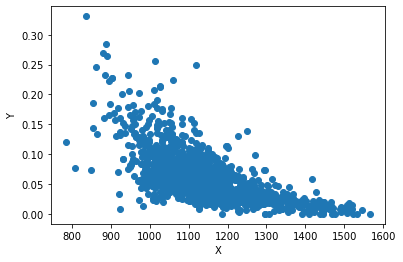

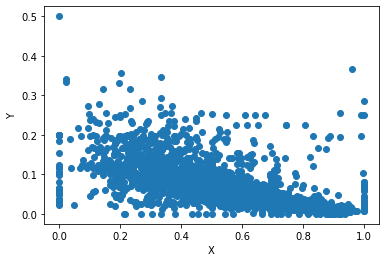

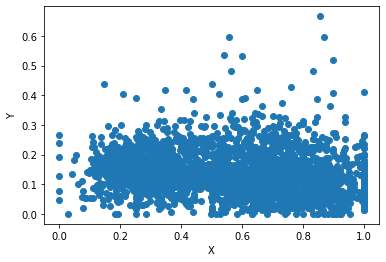

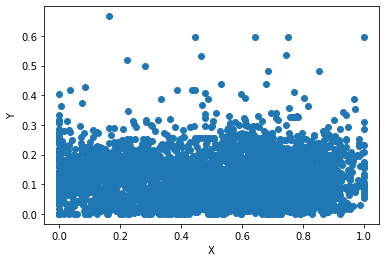

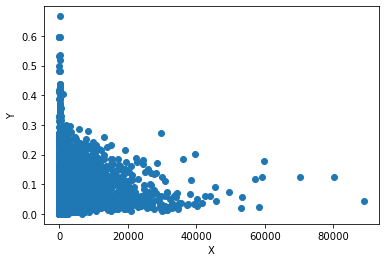

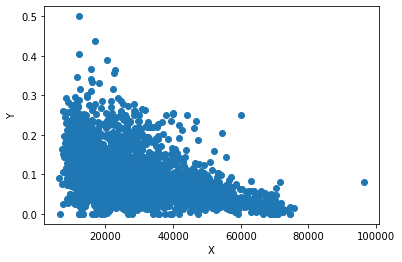

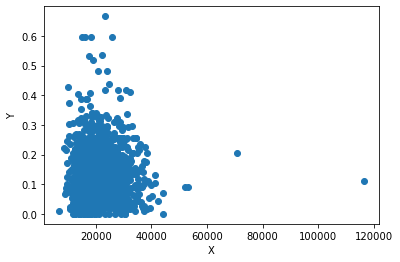

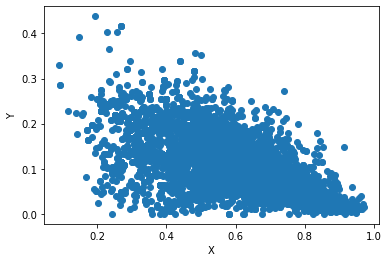

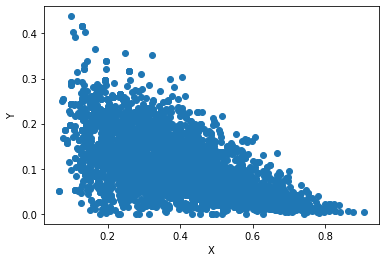

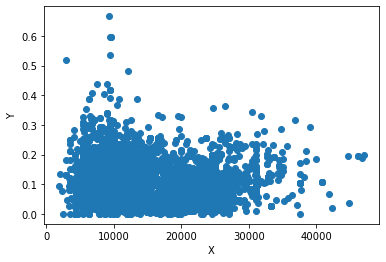

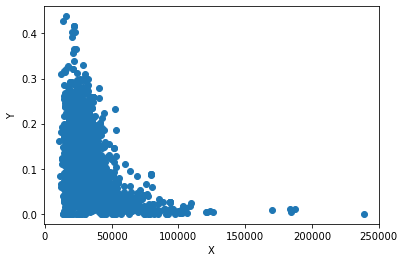

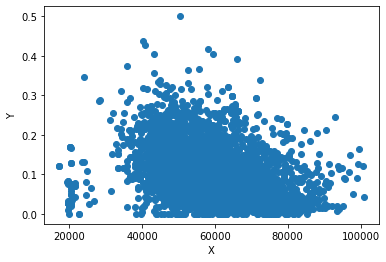

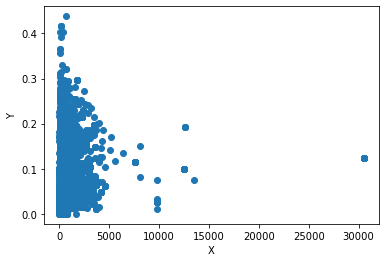

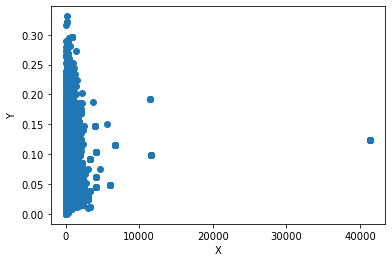

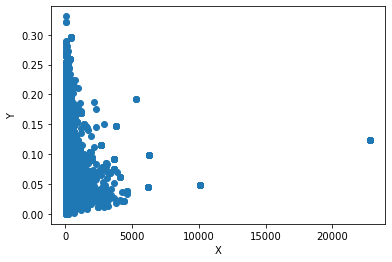

In [84]:
## Scatter plots for numerical variables
for i in df[numeric_cols]:
    plt.scatter(df[i].tolist(), df.CDR3.tolist())
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    
## NB: presence of outliers

## Check target variable distribution

In [85]:
resp = df['CDR3']
stat, p = shapiro(resp)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian --> fail to reject H0')
else:
    print('Sample does not look Gaussian --> reject H0')

Statistics=0.932, p=0.000
Sample does not look Gaussian --> reject H0


/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<AxesSubplot:xlabel='CDR3', ylabel='Density'>

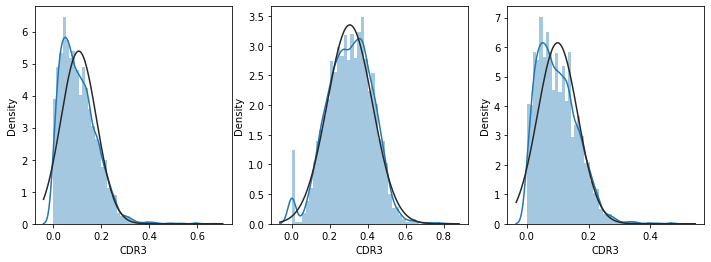

In [86]:
fig, ax = plt.subplots(1, 3)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)

sns.distplot(df['CDR3'], ax=ax[0], fit=norm)
sns.distplot(np.sqrt(df['CDR3']), ax=ax[1], fit= norm)
sns.distplot(np.log(df['CDR3']+1), ax=ax[2], fit= norm)
## With np.sqrt transformation it resembles a normal distribution

## COSTT4_A and COSTT4_P

I will operate on COSTA and COSTP. From the data dictionary, COSTT4_A (COSTA) and COSTT4_P (COSTP) are the average costs of attendance for academic-year institutions and program-year institutions respectively. There are too many missing values and as obvious, some of them must be non-random NA values. This is because only the academic-year institutions will have a value for COSTA feature and NULL for the rest and vice-versa. I can go ahead and engineer a common feature representing the cost of attendance irrespective of whether the institute is an academic-year based or program-year.

In [87]:
#train set
df['COSTT4_A'][df['COSTT4_A'].isnull() & df['COSTT4_P'].notnull()] = 0
df['COSTT4_P'][df['COSTT4_P'].isnull() & df['COSTT4_A'].notnull()] = 0
# now create a feature for the cost of attendance
df['COST'] = df['COSTT4_A'] + df['COSTT4_P']
df.drop(["COSTT4_A"], axis=1, inplace=True)
df.drop(["COSTT4_P"], axis=1, inplace=True)

#test set
test['COSTT4_A'][test['COSTT4_A'].isnull() & test['COSTT4_P'].notnull()] = 0
test['COSTT4_P'][test['COSTT4_P'].isnull() & test['COSTT4_A'].notnull()] = 0
# now create a feature for the cost of attendance
test['COST'] = test['COSTT4_A'] + test['COSTT4_P']
test.drop(["COSTT4_A"], axis=1, inplace=True)
test.drop(["COSTT4_P"], axis=1, inplace=True)

<ipython-input-87-18ce2f281c77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COSTT4_A'][df['COSTT4_A'].isnull() & df['COSTT4_P'].notnull()] = 0
<ipython-input-87-18ce2f281c77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COSTT4_P'][df['COSTT4_P'].isnull() & df['COSTT4_A'].notnull()] = 0
<ipython-input-87-18ce2f281c77>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['COSTT4_A'][test['COSTT4_A'].isnull() & test['CO

I will operate on C150_4 and C150_L4. From the data dictionary, C150_4 and C150_L4 are the proportion of full-time, first-time, degree/certificate-seeking undergraduates who completed a degree or certificate at the institution within 150 percent of normal time for 4-year institutions and less-than-4-year institutions respectively. There are too many missing values and as obvious, some of them must be non-random NA values. This is because only the 4-year institutions will have a value for C150 feature and NULL for the rest and vice-versa. I can go ahead and engineer a common feature representing the the proportion of undergraduates who completed a degree within 150 percent irrespective of whether the institute is 4-year or less.

In [88]:
#train set
df['C150_4'][df['C150_4'].isnull() & df['C150_L4'].notnull()] = 0
df['C150_L4'][df['C150_L4'].isnull() & df['C150_4'].notnull()] = 0
# now create a feature for the cost of attendance
df['C150'] = df['C150_L4'] + df['C150_4']
df.drop(["C150_L4"], axis=1, inplace=True)
df.drop(["C150_4"], axis=1, inplace=True)

#test set
test['C150_4'][test['C150_4'].isnull() & test['C150_L4'].notnull()] = 0
test['C150_L4'][test['C150_L4'].isnull() & test['C150_4'].notnull()] = 0
# now create a feature for the cost of attendance
test['C150'] = test['C150_L4'] + test['C150_4']
test.drop(["C150_L4"], axis=1, inplace=True)
test.drop(["C150_4"], axis=1, inplace=True)

<ipython-input-88-9f77c0040012>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['C150_4'][df['C150_4'].isnull() & df['C150_L4'].notnull()] = 0
<ipython-input-88-9f77c0040012>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['C150_L4'][df['C150_L4'].isnull() & df['C150_4'].notnull()] = 0
<ipython-input-88-9f77c0040012>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['C150_4'][test['C150_4'].isnull() & test['C150_L4'].notnu

## Feature selection

In [89]:
## Discrete variables
# ANOVA test (to do without missing values)
data = df.dropna()

#ICLEVEL
a = data["CDR3"].loc[data['ICLEVEL'] == 1]
b = data["CDR3"].loc[data['ICLEVEL'] == 2]
#c = data["CDR3"].loc[data['ICLEVEL'] == 3]

t,pval = stats.f_oneway(a,b)
if pval < 0.025:
    j = 'SIGNIFICANT'
else:
    j = 'INSIGNIFICANT'
print("ICLEVEL", ', ', t, ', ', pval, ', ', j)


#CONTROL
a = data["CDR3"].loc[data['CONTROL'] == 1]
b = data["CDR3"].loc[data['CONTROL'] == 2]
c = data["CDR3"].loc[data['CONTROL'] == 3]

t,pval = stats.f_oneway(a,b,c)
if pval < 0.025:
    j = 'SIGNIFICANT'
else:
    j = 'INSIGNIFICANT'
print("CONTROL", ', ', t, ', ', pval, ', ', j)

#HIGHDEG
a = data["CDR3"].loc[data['HIGHDEG'] == 1]
b = data["CDR3"].loc[data['HIGHDEG'] == 2]
c = data["CDR3"].loc[data['HIGHDEG'] == 3]
d = data["CDR3"].loc[data['HIGHDEG'] == 4]

t,pval = stats.f_oneway(a,b,c,d)
if pval < 0.025:
    j = 'SIGNIFICANT'
else:
    j = 'INSIGNIFICANT'
print("HIGHDEG", ', ', t, ', ', pval, ', ', j)

ICLEVEL ,  27.820491185861652 ,  1.5810175924266726e-07 ,  SIGNIFICANT
CONTROL ,  8.263438937837178 ,  0.000272916358946998 ,  SIGNIFICANT
HIGHDEG ,  21.024875947297634 ,  2.840998556916733e-13 ,  SIGNIFICANT


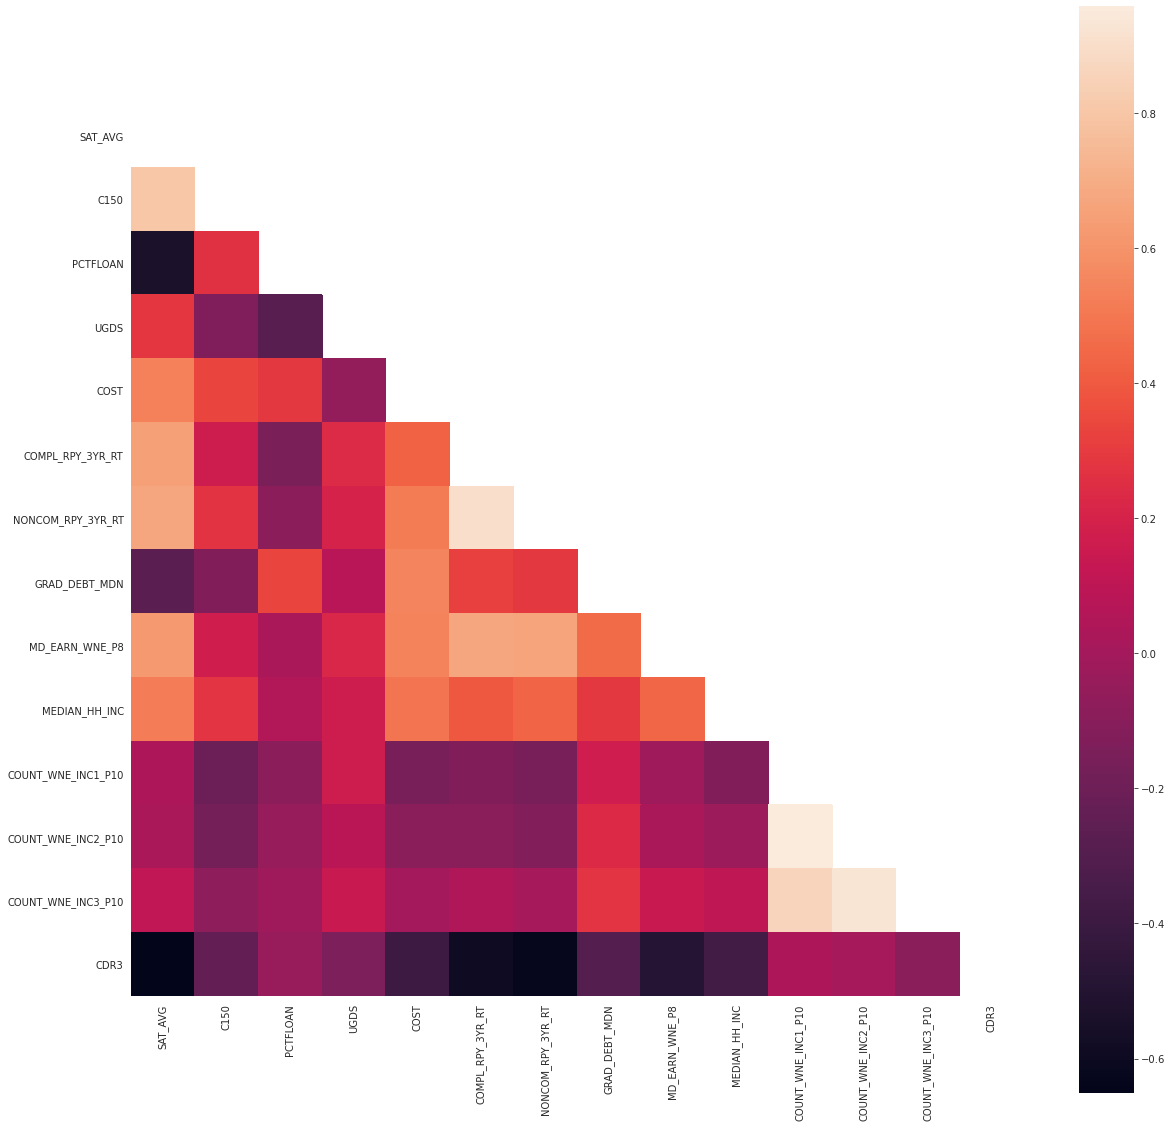

In [90]:
numeric_cols = ['SAT_AVG', 'C150', 'PCTFLOAN', 'UGDS', 'COST', 'COMPL_RPY_3YR_RT', 'NONCOM_RPY_3YR_RT', 'GRAD_DEBT_MDN', 'MD_EARN_WNE_P8', 'MEDIAN_HH_INC',
            'COUNT_WNE_INC1_P10', 'COUNT_WNE_INC2_P10', 'COUNT_WNE_INC3_P10']

corrMatrix = df[numeric_cols+['CDR3']].corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corrMatrix, mask=mask, square=True) 

## Categorical variables

In [91]:
print(pd.unique(df['CONTROL'].values.ravel()))
print(pd.unique(df['ICLEVEL'].values.ravel()))
print(pd.unique(df['HIGHDEG'].values.ravel()))

[3 2 1]
[3 1 2]
[1 3 2 4 0]


In [92]:
## ONE HOT ENCODING FOR CATEGORICAL VARIABLES
#train set
if 'CONTROL' in df.columns:
    hot1df = pd.get_dummies(df.CONTROL, prefix='CONTROL', drop_first=True)
    df = pd.concat([df, hot1df], axis=1)
    df.drop(["CONTROL"], axis=1, inplace=True)
if 'ICLEVEL' in df.columns:
    hot1df = pd.get_dummies(df.ICLEVEL, prefix='ICLEVEL', drop_first=True)
    df = pd.concat([df, hot1df], axis=1)
    df.drop(["ICLEVEL"], axis=1, inplace=True)
if 'HIGHDEG' in df.columns:
    hot1df = pd.get_dummies(df.HIGHDEG, prefix='HIGHDEG', drop_first=True)
    df = pd.concat([df, hot1df], axis=1)
    df.drop(["HIGHDEG"], axis=1, inplace=True)
    
#test set
if 'CONTROL' in test.columns:
    hot1df = pd.get_dummies(test.CONTROL, prefix='CONTROL', drop_first=True)
    test = pd.concat([test, hot1df], axis=1)
    test.drop(["CONTROL"], axis=1, inplace=True)
if 'ICLEVEL' in test.columns:
    hot1df = pd.get_dummies(test.ICLEVEL, prefix='ICLEVEL', drop_first=True)
    test = pd.concat([test, hot1df], axis=1)
    test.drop(["ICLEVEL"], axis=1, inplace=True)
if 'HIGHDEG' in test.columns:
    hot1df = pd.get_dummies(test.HIGHDEG, prefix='HIGHDEG', drop_first=True)
    test = pd.concat([test, hot1df], axis=1)
    test.drop(["HIGHDEG"], axis=1, inplace=True)

In [93]:
df.head(1)

,CDR3,INSTNM,SAT_AVG,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4
5836,0.072,California Technical Academy,NaN,NaN,NaN,7568.0,0.1286,NaN,NaN,NaN,NaN,NaN,778.0,22280.0,0.875,0,1,0,1,1,0,0,0


In [94]:
test.head(1)

,CDR3,INSTNM,SAT_AVG,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4
16,NaN,Gadsden State Community College,NaN,NaN,NaN,NaN,0.0,23600.0,43919.51,1319.0,NaN,NaN,4147.0,10098.0,0.2133,0,0,1,0,0,1,0,0


In [95]:
df.drop_duplicates('INSTNM', inplace=True)
df.shape

(5770, 23)

## Delete rows with more than 5 missing values

In [97]:
df = df[df.isnull().sum(axis=1) < 6]
df.shape

(4081, 23)

In [98]:
print(df.isnull().sum())

CDR3                     0
INSTNM                   0
SAT_AVG               2836
COMPL_RPY_3YR_RT       170
NONCOM_RPY_3YR_RT      170
GRAD_DEBT_MDN           62
PCTFLOAN                74
MD_EARN_WNE_P8          63
MEDIAN_HH_INC          391
COUNT_WNE_INC1_P10     281
COUNT_WNE_INC2_P10     828
COUNT_WNE_INC3_P10     839
UGDS                    75
COST                   222
C150                   187
CONTROL_2                0
CONTROL_3                0
ICLEVEL_2                0
ICLEVEL_3                0
HIGHDEG_1                0
HIGHDEG_2                0
HIGHDEG_3                0
HIGHDEG_4                0
dtype: int64


In [99]:
## SAT_AVG has too many missing values --> delete this column

In [100]:
df = df.drop('SAT_AVG', axis = 1)
test = test.drop('SAT_AVG', axis = 1)

## Imputation of missing values

In [101]:
df.isnull().sum()

CDR3                    0
INSTNM                  0
COMPL_RPY_3YR_RT      170
NONCOM_RPY_3YR_RT     170
GRAD_DEBT_MDN          62
PCTFLOAN               74
MD_EARN_WNE_P8         63
MEDIAN_HH_INC         391
COUNT_WNE_INC1_P10    281
COUNT_WNE_INC2_P10    828
COUNT_WNE_INC3_P10    839
UGDS                   75
COST                  222
C150                  187
CONTROL_2               0
CONTROL_3               0
ICLEVEL_2               0
ICLEVEL_3               0
HIGHDEG_1               0
HIGHDEG_2               0
HIGHDEG_3               0
HIGHDEG_4               0
dtype: int64

In [102]:
df = df.drop('INSTNM', axis = 1)
test = test.drop('INSTNM', axis = 1)

In [103]:
print(df.shape)
print(test.shape)

(4081, 21)
(927, 21)


In [39]:
mno.matrix(df, figsize = (20, 6))

In [104]:
imputer = IterativeImputer()
# fit on the train only
imputer.fit(df)
# transform the dataset
Xtrans = pd.DataFrame(imputer.transform(df))
Xtrans.columns = df.columns
Xtrans.index = df.index

/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [105]:
#transform also the test set
TestTrans = pd.DataFrame(imputer.transform(test))
TestTrans.columns = test.columns
TestTrans.index = test.index

In [106]:
print(Xtrans.isnull().sum())
print(TestTrans.isnull().sum())

CDR3                  0
COMPL_RPY_3YR_RT      0
NONCOM_RPY_3YR_RT     0
GRAD_DEBT_MDN         0
PCTFLOAN              0
MD_EARN_WNE_P8        0
MEDIAN_HH_INC         0
COUNT_WNE_INC1_P10    0
COUNT_WNE_INC2_P10    0
COUNT_WNE_INC3_P10    0
UGDS                  0
COST                  0
C150                  0
CONTROL_2             0
CONTROL_3             0
ICLEVEL_2             0
ICLEVEL_3             0
HIGHDEG_1             0
HIGHDEG_2             0
HIGHDEG_3             0
HIGHDEG_4             0
dtype: int64
CDR3                  0
COMPL_RPY_3YR_RT      0
NONCOM_RPY_3YR_RT     0
GRAD_DEBT_MDN         0
PCTFLOAN              0
MD_EARN_WNE_P8        0
MEDIAN_HH_INC         0
COUNT_WNE_INC1_P10    0
COUNT_WNE_INC2_P10    0
COUNT_WNE_INC3_P10    0
UGDS                  0
COST                  0
C150                  0
CONTROL_2             0
CONTROL_3             0
ICLEVEL_2             0
ICLEVEL_3             0
HIGHDEG_1             0
HIGHDEG_2             0
HIGHDEG_3             0
HIG

## X and Y

In [107]:
df_y = Xtrans['CDR3']
df_x = Xtrans.drop('CDR3', axis = 1)

#test_y = test['CDR3']
test_x = TestTrans.drop('CDR3', axis = 1)

I am going to make a copy of the data in order to be able to compare performance using y and sqrt(y) and se which one performs better

In [108]:
X_train = df_x.copy()
y_train = df_y.copy()
X_test = test_x.copy()

In [109]:
# sqrt transformation for target variable (compare models using both y and sqrt(y))
y_train_sqrt = y_train.copy()
y_train_sqrt = y_train_sqrt.apply(lambda x: np.sqrt(x))

## Standardization 

I will make a copy of the data, so that later I can compare models with standardized data and raw data and see in which case they perform better

In [110]:
#MinMax Scaler
scaler = MinMaxScaler()
X_train_scal = df_x.copy()
X_test_scal = test_x.copy()

#fit on the train
scaler.fit(X_train_scal.iloc[:,:-8])

#transform both the train and the test
X_train_scal.iloc[:,:-8] = scaler.transform(X_train_scal.iloc[:,:-8])
X_test_scal.iloc[:,:-8] = scaler.transform(X_test_scal.iloc[:,:-8])

In [111]:
X_train_scal.head(1)

,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4
1501,0.301921,0.23804,0.121866,0.9024,0.085143,0.606184,0.046925,0.057923,0.084101,0.004567,0.394773,0.5918,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


## Divide df and df_sclaed in train + dev 

In [112]:
#not standardized
N = len(df_x)
train_size = int(N*0.85)
dev_size = int(N*0.15)

train = df_x[:train_size]
yt = df_y[:train_size]
dev = df_x[train_size: train_size+dev_size]
y_dev = df_y[train_size: train_size+dev_size]

print(len(train), len(dev))

3468 612


In [113]:
print(train.shape)
print(dev.shape)

(3468, 20)
(612, 20)


In [114]:
#standardized data
N = len(df_x)
train_size = int(N*0.85)
dev_size = int(N*0.15)

train_s = X_train_scal[:train_size]
#yt = df_y[:train_size]
dev_s = X_train_scal[train_size: train_size+dev_size]
#y_dev = df_y[train_size: train_size+dev_size]

print(len(train_s), len(dev_s))

3468 612


In [115]:
print(train_s.shape)
print(dev_s.shape)

(3468, 20)
(612, 20)


## Models

In [116]:
#Without standardization
rf = RandomForestRegressor(random_state = 1, n_jobs = -1, criterion = "mae")
score = cross_val_score(rf, train, yt, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
rf.fit(train, yt)
print("MAE score:", score)


MAE score: [-0.02800391 -0.02829495 -0.02674159]


In [117]:
predictions = rf.predict(dev)
# Calculate the absolute errors
errors = abs(predictions - y_dev)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(y_dev, predictions)

Mean Absolute Error: 0.03 degrees.


0.025983725490196077

In [121]:
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_list = list(train.columns)
features = np.array(train)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: NONCOM_RPY_3YR_RT    Importance: 0.31
Variable: MD_EARN_WNE_P8       Importance: 0.13
Variable: C150                 Importance: 0.08
Variable: COMPL_RPY_3YR_RT     Importance: 0.07
Variable: GRAD_DEBT_MDN        Importance: 0.06
Variable: COUNT_WNE_INC1_P10   Importance: 0.06
Variable: PCTFLOAN             Importance: 0.05
Variable: MEDIAN_HH_INC        Importance: 0.04
Variable: COUNT_WNE_INC2_P10   Importance: 0.04
Variable: COUNT_WNE_INC3_P10   Importance: 0.04
Variable: UGDS                 Importance: 0.04
Variable: COST                 Importance: 0.04
Variable: CONTROL_2            Importance: 0.01
Variable: CONTROL_3            Importance: 0.01
Variable: ICLEVEL_2            Importance: 0.01
Variable: HIGHDEG_2            Importance: 0.01
Variable: HIGHDEG_4            Importance: 0.01
Variable: ICLEVEL_3            Importance: 0.0
Variable: HIGHDEG_1            Importance: 0.0
Variable: HIGHDEG_3            Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
rf = RandomForestRegressor(random_state = 1, n_jobs = -1)

min_samples_leaf_n = [1, 10, 50]
max_features_n = ['auto', 'sqrt']
n_estimators_n = [50,100,200]

param_grid = [
    {'min_samples_leaf': min_samples_leaf_n,
     'max_features': max_features_n,
     'n_estimators': n_estimators_n,
    },
    ]

grid = GridSearchCV(rf, param_grid, cv = 3, scoring='neg_mean_absolute_error', n_jobs = -1)
grid.fit(X_train, y_train.values.ravel())

print(grid.best_params_)
print(grid.best_score_)

In [119]:
#With standardization
rf = RandomForestRegressor(random_state = 1, n_jobs = -1, criterion = "mae")
score = cross_val_score(rf, train_s, yt, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
rf.fit(train_s, yt)
print("MAE score:", score)


MAE score: [-0.0280074  -0.02829388 -0.0267406 ]
